In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#wczytanie i zlaczenie plikow
allFiles = ['dane.csv', 'dane2.csv', 'dane3.csv']
data = []
for f in allFiles:
    df = pd.read_csv(f, sep=';')
    data.append(df)
frame = pd.merge(data[0], data[1], on='Data')
frame = pd.merge(frame, data[2], on='Data')

In [3]:
frame[0:5]

Data  poziom wody w piezometrze B1 npm [cm]  \
0  2008-09-23                                  67.21   
1  2008-09-24                                  66.29   
2  2008-09-25                                  65.21   
3  2008-09-26                                  64.33   
4  2008-09-27                                  63.40   

   temperatura wody w piezometrze B1 [C]  poziom morza  \
0                                  12.57        493.50   
1                                  12.56        490.67   
2                                  12.54        486.67   
3                                  12.53        481.00   
4                                  12.51        480.67   

   poziom morza  [cm] npm  Opady  Temperatura powietrza [C]  Prędkość wiatru  \
0                  -14.50    0.0                      12.13             3.88   
1                  -17.33    0.0                      10.86             4.50   
2                  -21.33    0.0                      10.05             2.63   
3                  -27.00    0.0                       9.54             1.88   
4                  -27.33    0.0                      13.00             6.63   

   Kierunek wiatru  Unnamed: 5  Unnamed: 6 kierunki wiatru  zakres kąta  
0            66.25         NaN         NaN               N       0<22,5  
1            53.75         NaN         NaN              NE    22,5-67,5  
2            30.00         NaN         NaN               E   67,5-112,5  
3           212.50         NaN         NaN              SE  112,5-157,5  
4           242.50         NaN         NaN               S  157,5-202,5

In [4]:
#zmiana nazw kolumn
columns = { 'Data' : 'date', 'poziom wody w piezometrze B1 npm [cm]': 'waterlv',
            'temperatura wody w piezometrze B1 [C]': 'watertemp',
            'poziom morza': 'sealv',
            'Opady' : 'precip', 'Temperatura powietrza [C]': 'temp',
            'Prędkość wiatru' : 'vwind', 'Kierunek wiatru' : 'dwind' }
frame = frame[list(columns.keys())].rename(columns=columns)

In [5]:
frame[0:3]

date  waterlv  watertemp   sealv  precip   temp  vwind  dwind
0  2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88  66.25
1  2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50  53.75
2  2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63  30.00

In [6]:
frame.shape

(2139, 8)

In [7]:
frame.describe

<bound method NDFrame.describe of             date  waterlv  watertemp   sealv  precip   temp  vwind   dwind
0     2008-09-23    67.21      12.57  493.50    0.00  12.13   3.88   66.25
1     2008-09-24    66.29      12.56  490.67    0.00  10.86   4.50   53.75
2     2008-09-25    65.21      12.54  486.67    0.00  10.05   2.63   30.00
3     2008-09-26    64.33      12.53  481.00    0.00   9.54   1.88  212.50
4     2008-09-27    63.40      12.51  480.67    0.00  13.00   6.63  242.50
5     2008-09-28    62.59      12.49  479.33    0.90  13.15   7.75  255.00
6     2008-09-29    61.62      12.47  493.00    5.70  10.96   6.13  240.00
7     2008-09-30    61.48      12.44  492.00    2.40  10.29   6.13  207.50
8     2008-10-01    61.23      12.42  493.50    9.60  11.06   9.25  213.75
9     2008-10-02    61.33      12.40  497.83    0.00  10.30  11.38  220.00
10    2008-10-03    63.72      12.39  506.17    0.20   9.19   7.00  211.25
11    2008-10-04    65.63      12.37  506.50    0.00   8.95   6.38

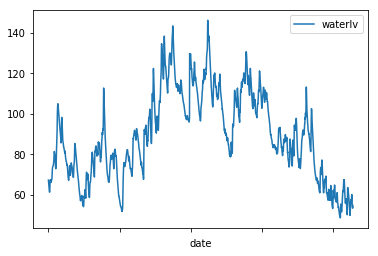

In [8]:
#wykres zmiany poziomu morza w czasie
frame.plot(x='date', y='waterlv')

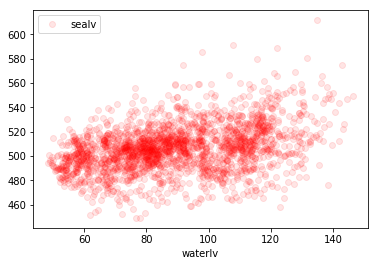

In [9]:
#wykres poziom wody w piezometrze w stosunku do poziomu wody w morzu
frame.plot(x='waterlv', y='sealv', style='ro', alpha=0.1)

In [10]:
#zamiana kolumny z datami na typ datetime
frame['date'] = pd.to_datetime(frame['date'])
print (frame['date'].dtype)
frame.set_index(frame["date"],inplace=True)
#suma poziomu wody w piezometrze dla miesiecy
df1 = frame['waterlv'].resample('M', how='sum')

datetime64[ns]


/home/agnieszka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [11]:
#zamiana na radiany
frame['wind'] = frame['dwind'].apply(math.radians)
#sin
frame['sin'] = frame['wind'].apply(math.sin)
#cos
frame['cos'] = frame['wind'].apply(math.cos)

In [12]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  
date                                              
2008-09-23   66.25  1.156281  0.915311  0.402747  
2008-09-24   53.75  0.938114  0.806445  0.591310  
2008-09-25   30.00  0.523599  0.500000  0.866025  
2008-09-26  212.50  3.708825 -0.537300 -0.843391  
2008-09-27  242.50  4.232423 -0.887011 -0.461749  
2008-09-28  255.00  4.450590 -0.965926 -0.258819  
2008-09-29  240.00  4.188790 -0.866025 -0.500000  
2008-09-30  207.50  3.621558 -0.461749 -0.887011  
2008-10-01  213.75  3.730641 -0.555570 -0.831470  
2008-10-02  220.00  3.839724 -0.642788 -0.766044

In [13]:
#tworzenie kolumn z wartosciami opadow od 1 do 5 dni wstecz
def precip_before(date, days_count):
    key = date - timedelta(days=days_count)
    if key in frame.index:
        return frame.loc[key]['precip']
    else:
        return None
    
for i in range(1,6):
    frame['precip'+ str(i)] = frame['date'].apply(lambda x : precip_before(x, i))

In [14]:
frame[10:20]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   
2008-10-08 2008-10-08    67.47      12.27  511.83     0.0   7.81   1.50   
2008-10-09 2008-10-09    66.82      12.25  508.67     0.4   9.65   3.38   
2008-10-10 2008-10-10    66.12      12.22  510.00     0.0  11.63   5.38   
2008-10-11 2008-10-11    66.33      12.19  497.50     0.0  13.06   6.25   
2008-10-12 2008-10-12    66.28      12.15  512.83     3.2  12.43   6.63   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   
2008-10-08  128.75  2.247111  0.779884 -0.625923      0.0      0.0      0.5   
2008-10-09  200.00  3.490659 -0.342020 -0.939693      0.0      0.0      0.0   
2008-10-10  243.75  4.254240 -0.896873 -0.442289      0.4      0.0      0.0   
2008-10-11  230.00  4.014257 -0.766044 -0.642788      0.0      0.4      0.0   
2008-10-12  252.50  4.406956 -0.953717 -0.300706      0.0      0.0      0.4   

            precip4  precip5  
date                          
2008-10-03      5.7      0.9  
2008-10-04      2.4      5.7  
2008-10-05      9.6      2.4  
2008-10-06      0.0      9.6  
2008-10-07      0.2      0.0  
2008-10-08      0.0      0.2  
2008-10-09      0.5      0.0  
2008-10-10      0.0      0.5  
2008-10-11      0.0      0.0  
2008-10-12      0.0      0.0

In [15]:
#tworzenie kolumny z suma opadow 5 dni wstecz
try:
    frame['precipsum']=frame.iloc[:,11:16].sum(axis=1)
except:
    None
        

In [16]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-23   66.25  1.156281  0.915311  0.402747      NaN      NaN      NaN   
2008-09-24   53.75  0.938114  0.806445  0.591310      0.0      NaN      NaN   
2008-09-25   30.00  0.523599  0.500000  0.866025      0.0      0.0      NaN   
2008-09-26  212.50  3.708825 -0.537300 -0.843391      0.0      0.0      0.0   
2008-09-27  242.50  4.232423 -0.887011 -0.461749      0.0      0.0      0.0   
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   

            precip4  precip5  precipsum  
date                                     
2008-09-23      NaN      NaN        0.0  
2008-09-24      NaN      NaN        0.0  
2008-09-25      NaN      NaN        0.0  
2008-09-26      NaN      NaN        0.0  
2008-09-27      0.0      NaN        0.0  
2008-09-28      0.0      0.0        0.0  
2008-09-29      0.0      0.0        0.9  
2008-09-30      0.0      0.0        6.6  
2008-10-01      0.0      0.0        9.0  
2008-10-02      0.9      0.0       18.6

In [17]:
#tworzenie kolumny ze srednia temperatura dla 5 dni wstecz
def mean_temp5(date):
    tlist = []
    for i in range(1,6):
        key = date - timedelta(days=i)
        if key in frame.index:
            tlist.append(frame.loc[key]['temp'])
        else:
            return None
    return np.mean(tlist)

frame['meantemp'] = frame['date'].apply(mean_temp5)

In [18]:
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-23 2008-09-23    67.21      12.57  493.50     0.0  12.13   3.88   
2008-09-24 2008-09-24    66.29      12.56  490.67     0.0  10.86   4.50   
2008-09-25 2008-09-25    65.21      12.54  486.67     0.0  10.05   2.63   
2008-09-26 2008-09-26    64.33      12.53  481.00     0.0   9.54   1.88   
2008-09-27 2008-09-27    63.40      12.51  480.67     0.0  13.00   6.63   
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-23   66.25  1.156281  0.915311  0.402747      NaN      NaN      NaN   
2008-09-24   53.75  0.938114  0.806445  0.591310      0.0      NaN      NaN   
2008-09-25   30.00  0.523599  0.500000  0.866025      0.0      0.0      NaN   
2008-09-26  212.50  3.708825 -0.537300 -0.843391      0.0      0.0      0.0   
2008-09-27  242.50  4.232423 -0.887011 -0.461749      0.0      0.0      0.0   
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-23      NaN      NaN        0.0       NaN  
2008-09-24      NaN      NaN        0.0       NaN  
2008-09-25      NaN      NaN        0.0       NaN  
2008-09-26      NaN      NaN        0.0       NaN  
2008-09-27      0.0      NaN        0.0       NaN  
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692

In [19]:
# usuniecie wierszy z NaN
frame = frame.dropna()
frame[0:10]

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692  
2008-10-03      5.7      0.9       18.6    11.152  
2008-10-04      2.4      5.7       17.9    10.360  
2008-10-05      9.6      2.4       12.2     9.958  
2008-10-06      0.0      9.6       10.3     9.666  
2008-10-07      0.2      0.0        0.7     9.394

In [20]:
# zapis do pliku csv
frame.to_csv('result.csv')

Eksploracja

In [21]:
#shape
frame.shape
type(frame)

pandas.core.frame.DataFrame

In [22]:
#data types
print(frame.dtypes)

date         datetime64[ns]
waterlv             float64
watertemp           float64
sealv               float64
precip              float64
temp                float64
vwind               float64
dwind               float64
wind                float64
sin                 float64
cos                 float64
precip1             float64
precip2             float64
precip3             float64
precip4             float64
precip5             float64
precipsum           float64
meantemp            float64
dtype: object


In [23]:
#head
frame.head(15)

date  waterlv  watertemp   sealv  precip   temp  vwind  \
date                                                                      
2008-09-28 2008-09-28    62.59      12.49  479.33     0.9  13.15   7.75   
2008-09-29 2008-09-29    61.62      12.47  493.00     5.7  10.96   6.13   
2008-09-30 2008-09-30    61.48      12.44  492.00     2.4  10.29   6.13   
2008-10-01 2008-10-01    61.23      12.42  493.50     9.6  11.06   9.25   
2008-10-02 2008-10-02    61.33      12.40  497.83     0.0  10.30  11.38   
2008-10-03 2008-10-03    63.72      12.39  506.17     0.2   9.19   7.00   
2008-10-04 2008-10-04    65.63      12.37  506.50     0.0   8.95   6.38   
2008-10-05 2008-10-05    66.91      12.35  483.67     0.5   8.83   7.88   
2008-10-06 2008-10-06    67.23      12.33  504.67     0.0   9.70   3.13   
2008-10-07 2008-10-07    67.23      12.30  513.67     0.0   6.55   1.88   
2008-10-08 2008-10-08    67.47      12.27  511.83     0.0   7.81   1.50   
2008-10-09 2008-10-09    66.82      12.25  508.67     0.4   9.65   3.38   
2008-10-10 2008-10-10    66.12      12.22  510.00     0.0  11.63   5.38   
2008-10-11 2008-10-11    66.33      12.19  497.50     0.0  13.06   6.25   
2008-10-12 2008-10-12    66.28      12.15  512.83     3.2  12.43   6.63   

             dwind      wind       sin       cos  precip1  precip2  precip3  \
date                                                                          
2008-09-28  255.00  4.450590 -0.965926 -0.258819      0.0      0.0      0.0   
2008-09-29  240.00  4.188790 -0.866025 -0.500000      0.9      0.0      0.0   
2008-09-30  207.50  3.621558 -0.461749 -0.887011      5.7      0.9      0.0   
2008-10-01  213.75  3.730641 -0.555570 -0.831470      2.4      5.7      0.9   
2008-10-02  220.00  3.839724 -0.642788 -0.766044      9.6      2.4      5.7   
2008-10-03  211.25  3.687008 -0.518773 -0.854912      0.0      9.6      2.4   
2008-10-04  225.00  3.926991 -0.707107 -0.707107      0.2      0.0      9.6   
2008-10-05  198.75  3.468842 -0.321439 -0.946930      0.0      0.2      0.0   
2008-10-06  237.50  4.145157 -0.843391 -0.537300      0.5      0.0      0.2   
2008-10-07  162.50  2.836160  0.300706 -0.953717      0.0      0.5      0.0   
2008-10-08  128.75  2.247111  0.779884 -0.625923      0.0      0.0      0.5   
2008-10-09  200.00  3.490659 -0.342020 -0.939693      0.0      0.0      0.0   
2008-10-10  243.75  4.254240 -0.896873 -0.442289      0.4      0.0      0.0   
2008-10-11  230.00  4.014257 -0.766044 -0.642788      0.0      0.4      0.0   
2008-10-12  252.50  4.406956 -0.953717 -0.300706      0.0      0.0      0.4   

            precip4  precip5  precipsum  meantemp  
date                                               
2008-09-28      0.0      0.0        0.0    11.116  
2008-09-29      0.0      0.0        0.9    11.320  
2008-09-30      0.0      0.0        6.6    11.340  
2008-10-01      0.0      0.0        9.0    11.388  
2008-10-02      0.9      0.0       18.6    11.692  
2008-10-03      5.7      0.9       18.6    11.152  
2008-10-04      2.4      5.7       17.9    10.360  
2008-10-05      9.6      2.4       12.2     9.958  
2008-10-06      0.0      9.6       10.3     9.666  
2008-10-07      0.2      0.0        0.7     9.394  
2008-10-08      0.0      0.2        0.7     8.644  
2008-10-09      0.5      0.0        0.5     8.368  
2008-10-10      0.0      0.5        0.9     8.508  
2008-10-11      0.0      0.0        0.4     9.068  
2008-10-12      0.0      0.0        0.4     9.740

In [24]:
#descriptions
print(frame.describe())

           waterlv    watertemp        sealv       precip         temp  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean     89.282353     9.550714   506.334171     1.905838     7.919333   
std      21.178420     2.011780    19.060688     4.318492     7.436094   
min      48.500000     6.320000   449.270000     0.000000   -16.580000   
25%      73.500000     7.690000   494.330000     0.000000     2.630000   
50%      87.260000     9.330000   506.000000     0.090000     7.590000   
75%     106.910000    11.570000   516.600000     1.700000    13.980000   
max     146.330000    12.800000   611.440000    47.000000    27.810000   

             vwind        dwind         wind          sin          cos  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      4.606801   180.649624     3.152931    -0.077259    -0.412117   
std       2.243889    70.911251     1.237635     0.746914     0.516428   
min       0.380000    13.750000     0

In [25]:
df = frame[frame.columns.difference(['date', 'wind', 'dwind'])]
framey = df[df.columns.difference(['waterlv'])]
df[0:3]

cos  meantemp  precip  precip1  precip2  precip3  precip4  \
date                                                                         
2008-09-28 -0.258819    11.116     0.9      0.0      0.0      0.0      0.0   
2008-09-29 -0.500000    11.320     5.7      0.9      0.0      0.0      0.0   
2008-09-30 -0.887011    11.340     2.4      5.7      0.9      0.0      0.0   

            precip5  precipsum   sealv       sin   temp  vwind  waterlv  \
date                                                                      
2008-09-28      0.0        0.0  479.33 -0.965926  13.15   7.75    62.59   
2008-09-29      0.0        0.9  493.00 -0.866025  10.96   6.13    61.62   
2008-09-30      0.0        6.6  492.00 -0.461749  10.29   6.13    61.48   

            watertemp  
date                   
2008-09-28      12.49  
2008-09-29      12.47  
2008-09-30      12.44

In [26]:
#correlation
corr = frame.corr(method = 'pearson')
print(corr)

            waterlv  watertemp     sealv    precip      temp     vwind  \
waterlv    1.000000  -0.098659  0.359107  0.005270 -0.337894 -0.000283   
watertemp -0.098659   1.000000  0.341774  0.155111  0.539043 -0.009573   
sealv      0.359107   0.341774  1.000000  0.176834  0.149137  0.053729   
precip     0.005270   0.155111  0.176834  1.000000  0.144730  0.126234   
temp      -0.337894   0.539043  0.149137  0.144730  1.000000  0.026328   
vwind     -0.000283  -0.009573  0.053729  0.126234  0.026328  1.000000   
dwind      0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
wind       0.068600   0.081435  0.158080  0.076639  0.069502  0.357772   
sin       -0.058936  -0.066363 -0.144572 -0.083203 -0.085488 -0.424402   
cos       -0.024073  -0.119819  0.119697 -0.055976  0.025587  0.133401   
precip1    0.026013   0.157001  0.230579  0.176040  0.116302  0.188780   
precip2    0.058660   0.158838  0.191014  0.095769  0.100086  0.053903   
precip3    0.079909   0.159606  0.1739

/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


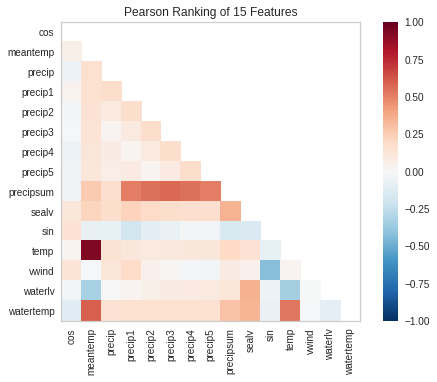

In [27]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df)
visualizer.poof()

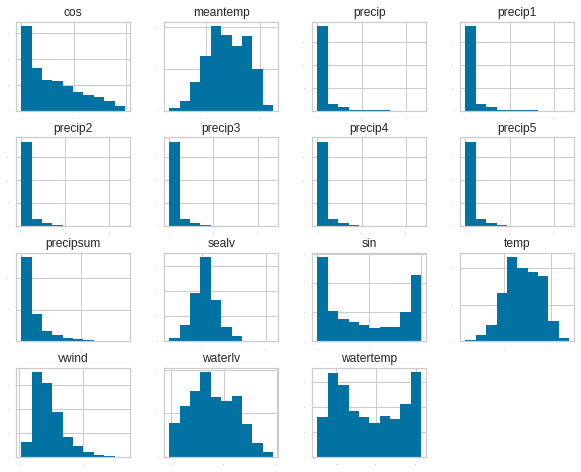

In [28]:
import matplotlib.pyplot as plt
#histograms
plt.rcParams['figure.figsize'] = [10, 8]
df.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
plt.show()

In [29]:
import seaborn as sns
sns.set(style="ticks")

#sns.pairplot(data=frame, kind="reg")

In [30]:
#skewness
skew = frame.skew()
print(skew)

waterlv      0.192278
watertemp    0.136306
sealv        0.428498
precip       4.210356
temp        -0.154314
vwind        1.160223
dwind       -0.320087
wind        -0.320087
sin          0.172266
cos          0.735983
precip1      4.203751
precip2      4.198780
precip3      4.211221
precip4      4.211071
precip5      4.206216
precipsum    1.983224
meantemp    -0.150414
dtype: float64


In [31]:
# funkcje wykonujaca transfromacje danych
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer


def getInverse(transformer, columns, x):
    inv = transformer.inverse_transform(x)
    inv = pd.DataFrame(inv)
    inv.columns = columns
    return inv

def transform(tr, x):
    tr = tr.fit(x)
    transformed = tr.transform(x)
    transformed = pd.DataFrame(transformed)
    transformed.columns = x.columns
    inverse = lambda inv: getInverse(tr, x.columns, inv)
    return transformed, inverse

def transformY(invTrans, y):
    _, cols = df.shape
    rows = y.shape[0]
    temp = np.zeros((rows, cols))
    temp[:, df.columns.get_loc("waterlv")] = y
    return np.array(invTrans(temp)['waterlv'])


pt, invPt = transform(PowerTransformer(), df)
qt, invQt = transform(QuantileTransformer(), df)

In [32]:
pt[0:3]

cos  meantemp    precip   precip1   precip2  precip3   precip4  \
0  0.506686  0.442775  0.621362 -0.887044 -0.886836 -0.88572 -0.884847   
1 -0.000770  0.471049  1.588824  0.618927 -0.886836 -0.88572 -0.884847   
2 -1.002154  0.473821  1.252593  1.587313  0.616872 -0.88572 -0.884847   

    precip5  precipsum     sealv       sin      temp     vwind   waterlv  \
0 -0.884599  -1.557798 -1.489672 -1.234428  0.703069  1.343533 -1.307498   
1 -0.884599  -0.995177 -0.680707 -1.077695  0.405022  0.832361 -1.362830   
2 -0.884599   0.224872 -0.737806 -0.466255  0.313974  0.832361 -1.370855   

   watertemp  
0   1.383112  
1   1.375174  
2   1.363247

In [33]:
qt[0:3]

cos  meantemp    precip       precip1       precip2       precip3  \
0  0.660661  0.632516  0.683684  1.000000e-07  1.000000e-07  1.000000e-07   
1  0.527528  0.639579  0.893894  6.836837e-01  1.000000e-07  1.000000e-07   
2  0.237738  0.640461  0.791291  8.933934e-01  6.836837e-01  1.000000e-07   

        precip4       precip5     precipsum     sealv       sin      temp  \
0  1.000000e-07  1.000000e-07  1.000000e-07  0.069069  0.121121  0.707708   
1  1.000000e-07  1.000000e-07  2.312312e-01  0.229229  0.227227  0.627385   
2  1.000000e-07  1.000000e-07  5.505506e-01  0.213714  0.417417  0.600601   

      vwind   waterlv  watertemp  
0  0.901902  0.124934   0.938939  
1  0.788789  0.114695   0.935936  
2  0.788789  0.112923   0.931932

In [34]:
df[0:3]

cos  meantemp  precip  precip1  precip2  precip3  precip4  \
date                                                                         
2008-09-28 -0.258819    11.116     0.9      0.0      0.0      0.0      0.0   
2008-09-29 -0.500000    11.320     5.7      0.9      0.0      0.0      0.0   
2008-09-30 -0.887011    11.340     2.4      5.7      0.9      0.0      0.0   

            precip5  precipsum   sealv       sin   temp  vwind  waterlv  \
date                                                                      
2008-09-28      0.0        0.0  479.33 -0.965926  13.15   7.75    62.59   
2008-09-29      0.0        0.9  493.00 -0.866025  10.96   6.13    61.62   
2008-09-30      0.0        6.6  492.00 -0.461749  10.29   6.13    61.48   

            watertemp  
date                   
2008-09-28      12.49  
2008-09-29      12.47  
2008-09-30      12.44

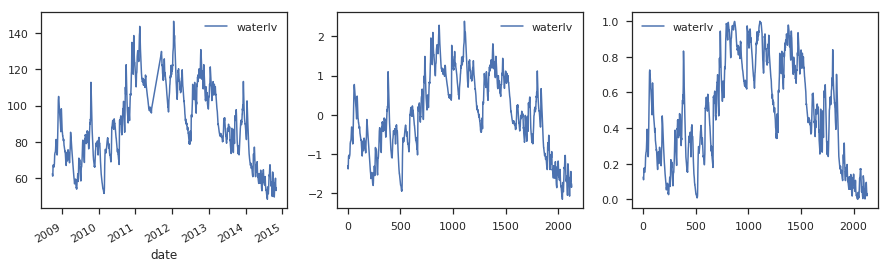

In [35]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
df.plot(y='waterlv', ax=ax1)
pt.plot(y='waterlv', ax=ax2)
qt.plot(y='waterlv', ax=ax3)

In [36]:
pcorr = pt.corr(method = 'pearson')
print(pcorr)

                cos  meantemp    precip   precip1   precip2   precip3  \
cos        1.000000  0.057779 -0.115749  0.008610 -0.038620 -0.030308   
meantemp   0.057779  1.000000  0.037525  0.040945  0.037221  0.025048   
precip    -0.115749  0.037525  1.000000  0.320791  0.128542  0.097410   
precip1    0.008610  0.040945  0.320791  1.000000  0.321788  0.129093   
precip2   -0.038620  0.037221  0.128542  0.321788  1.000000  0.321678   
precip3   -0.030308  0.025048  0.097410  0.129093  0.321678  1.000000   
precip4   -0.078159  0.012302  0.084613  0.097238  0.128552  0.322001   
precip5   -0.067494 -0.000772  0.066484  0.086839  0.098786  0.127036   
precipsum -0.067190  0.184290  0.219883  0.497678  0.546493  0.556498   
sealv      0.115097  0.249574  0.218059  0.307488  0.274971  0.252855   
sin        0.077828 -0.073176 -0.183687 -0.269931 -0.157978 -0.077963   
temp       0.023729  0.930483  0.043467  0.008609 -0.017671 -0.019132   
vwind      0.163841  0.013933  0.201824  0.211991  

cos          0.252897
meantemp    -0.152983
precip       0.640983
precip1      0.639891
precip2      0.639062
precip3      0.641183
precip4      0.642504
precip5      0.642594
precipsum   -0.001603
sealv       -0.016625
sin          0.087480
temp        -0.112746
vwind        0.003624
waterlv     -0.031245
watertemp   -0.009762
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


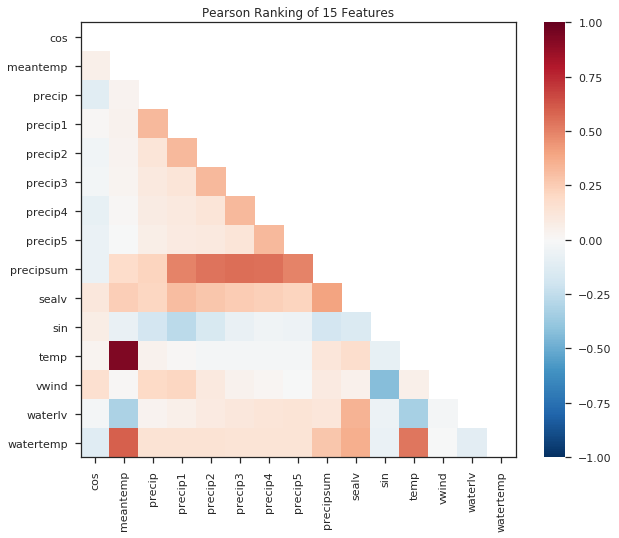

In [37]:
# transformed YeoJohnson skewness and correlation
print(pt.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(pt)
visualizer.poof()

cos         -0.000193
meantemp     0.000020
precip      -0.064511
precip1     -0.064541
precip2     -0.064073
precip3     -0.062655
precip4     -0.061379
precip5     -0.060361
precipsum   -0.055915
sealv       -0.000007
sin         -0.000707
temp        -0.000029
vwind        0.000087
waterlv     -0.000019
watertemp   -0.000088
dtype: float64


/home/agnieszka/.local/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


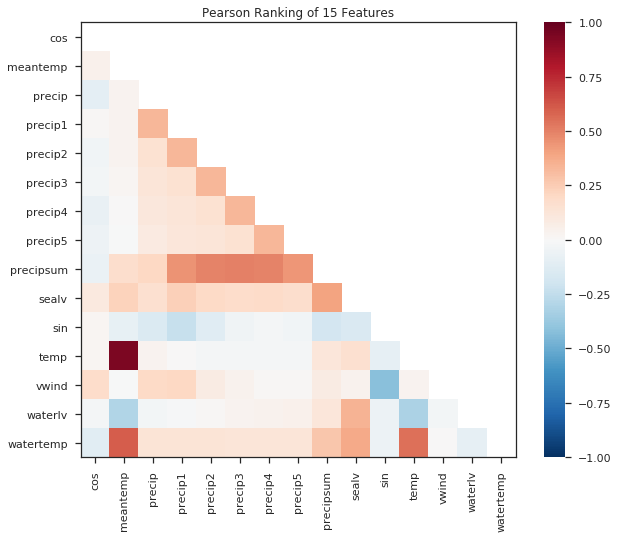

In [38]:
# transformed Quantile Transform skewness and correlation
print(qt.skew())
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(qt)
visualizer.poof()

In [39]:
waterlv_index = df.columns.get_loc("waterlv")
waterlv_index

13

In [40]:
#split-out validation dataset
from sklearn.model_selection import train_test_split
array = df.values
X = array[:, (0,1,2,3,4,5,6,7,9,10,11,12,14)].astype(np.float)
Y = array[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [41]:
#split-out after YeoJohnson transformation
tarray = pt.values
Xt = tarray[:, (0,1,2,3,4,5,6,7,9,10,11,12,14)].astype(np.float)
Yt = tarray[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
Xt_train, Xt_validation, Yt_train, Yt_validation = train_test_split(Xt,Yt, test_size = validation_size, random_state = seed)

In [42]:
#split-out after Quantile Transformer
qarray = qt.values
Xq = qarray[:, (0,1,2,3,4,5,6,7,9,10,11,12,14)].astype(np.float)
Yq = qarray[:, waterlv_index].astype(np.float)
validation_size = 0.20
seed = 7 
Xq_train, Xq_validation, Yq_train, Yq_validation = train_test_split(Xq,Yq, test_size = validation_size, random_state = seed)

In [43]:
def evaluation(clf, X_train, Y_train, X_test, Y_test, invTr = None):
    if invTr is None:
        tr = lambda y: y
    else:
        tr = lambda y: transformY(invTr, y)
    train = tr(Y_train)
    train_pred = tr(clf.predict(X_train))
    test = tr(Y_test)
    test_pred = tr(clf.predict(X_test))
    show_evaluation(train, train_pred, test, test_pred)

def show_evaluation(train, train_pred, test, test_pred):
    print ("RMSE training set:", np.sqrt(mean_squared_error(train, train_pred)))
    print ("RMSE testing set:", np.sqrt(mean_squared_error(test, test_pred)))
    print ("MAE training set:", mean_absolute_error(train, train_pred))
    print ("MAE testing set:", mean_absolute_error(test, test_pred))
    
    fig, ax = plt.subplots()
    sns.scatterplot(train,train_pred,ax=ax)
    sns.scatterplot(test,test_pred)
    plt.show()
    

In [44]:
def evaluateClf(clf, params):
    orig_clf = clf(**params)
    pt_clf = clf(**params)
    qt_clf = clf(**params)
    print(orig_clf)
    
    orig_clf.fit(X_train, Y_train)
    pt_clf.fit(Xt_train, Yt_train)
    qt_clf.fit(Xq_train, Yq_train)
    
    evaluation(orig_clf, X_train, Y_train, X_validation, Y_validation)
    evaluation(pt_clf, Xt_train, Yt_train, Xt_validation, Yt_validation, invPt)
    evaluation(qt_clf, Xq_train, Yq_train, Xq_validation, Yq_validation, invQt)

**Random Forest**

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
RMSE training set: 13.009431653957519
RMSE testing set: 15.104148768898956
MAE training set: 10.868460209167639
MAE testing set: 12.621523009341432


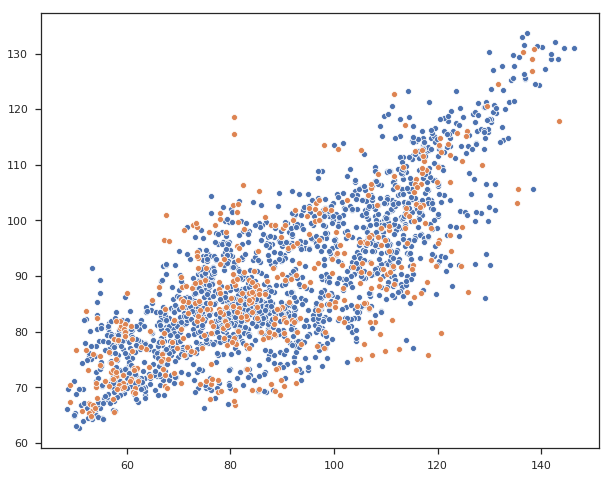

RMSE training set: 12.990040832755767
RMSE testing set: 15.145982490857504
MAE training set: 10.800917666970854
MAE testing set: 12.542701394412765


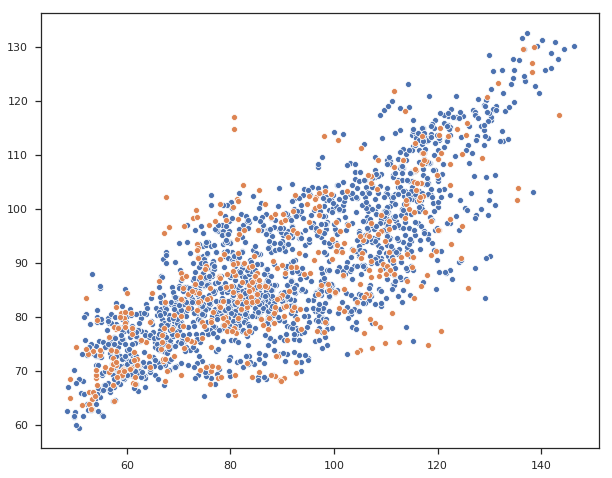

RMSE training set: 13.594601012044025
RMSE testing set: 15.531113180016389
MAE training set: 11.25900469636033
MAE testing set: 12.909544107588664


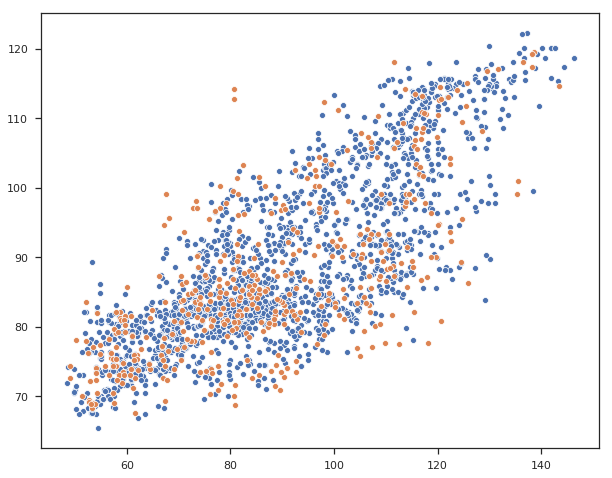

In [45]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':200, 'max_depth': 6, 'random_state': 0})

**Ridge**

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
RMSE training set: 17.49619375010321
RMSE testing set: 17.67683400833329
MAE training set: 14.815314809029209
MAE testing set: 14.920166331540072


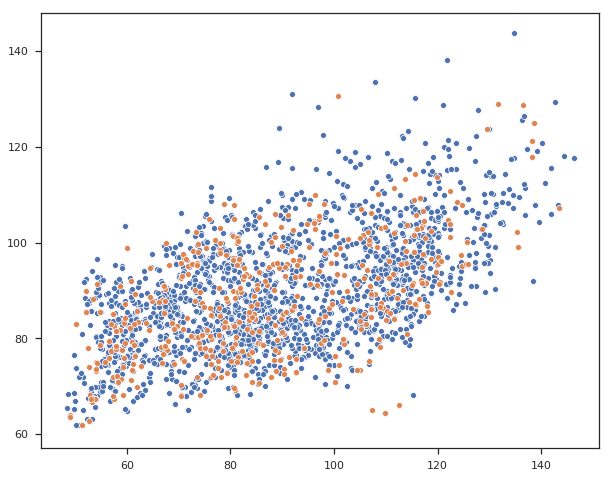

RMSE training set: 17.544939205933648
RMSE testing set: 17.84332258981672
MAE training set: 14.943250005151015
MAE testing set: 15.002490322241052


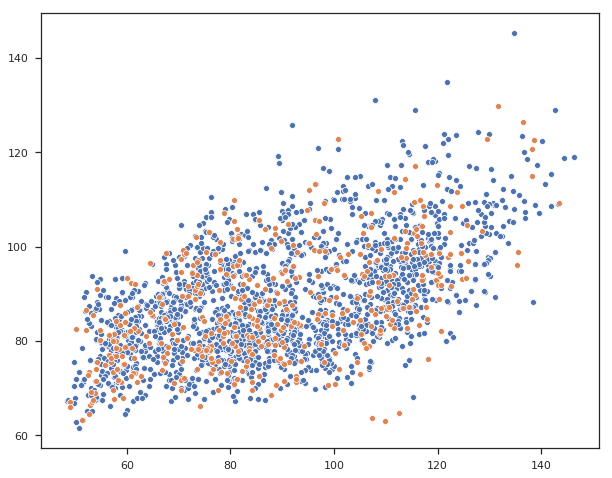

RMSE training set: 17.472311601320015
RMSE testing set: 17.65302765704949
MAE training set: 14.908779134219872
MAE testing set: 15.010158568130718


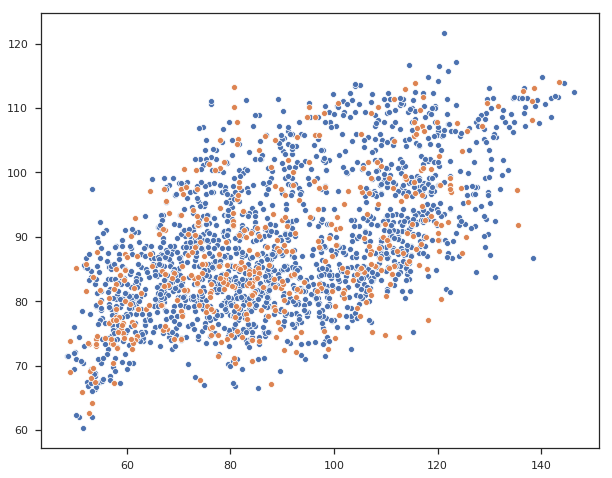

In [46]:
from sklearn import linear_model
evaluateClf(linear_model.Ridge, { 'alpha':.5})

**Lasso**

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
RMSE training set: 17.541347481252505
RMSE testing set: 17.67604280526534
MAE training set: 14.869869188313189
MAE testing set: 14.964509375189685


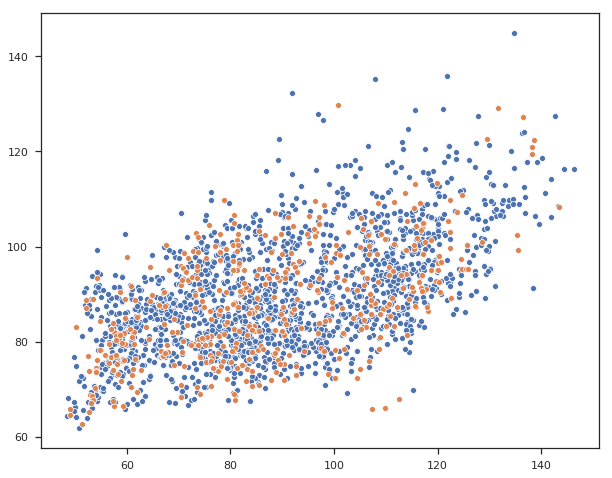

RMSE training set: 21.22092303390009
RMSE testing set: 21.104479900238815
MAE training set: 17.751734697210864
MAE testing set: 17.642379805364875


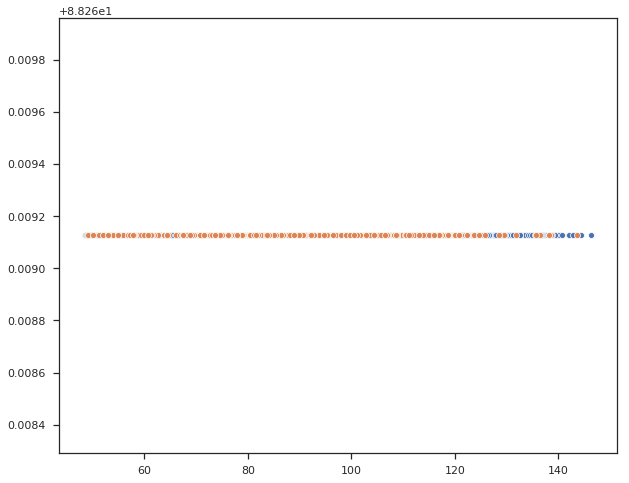

RMSE training set: 21.292324914839654
RMSE testing set: 21.105085633933022
MAE training set: 17.740603477379178
MAE testing set: 17.589658855770423


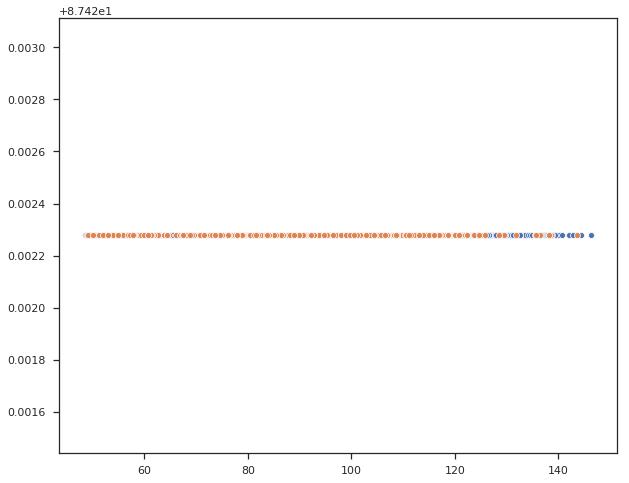

In [47]:
evaluateClf(linear_model.Lasso, { 'alpha':0.5})

**Elastic Net**

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
RMSE training set: 17.498102707346234
RMSE testing set: 17.67221685254534
MAE training set: 14.819855090144832
MAE testing set: 14.926419251956359


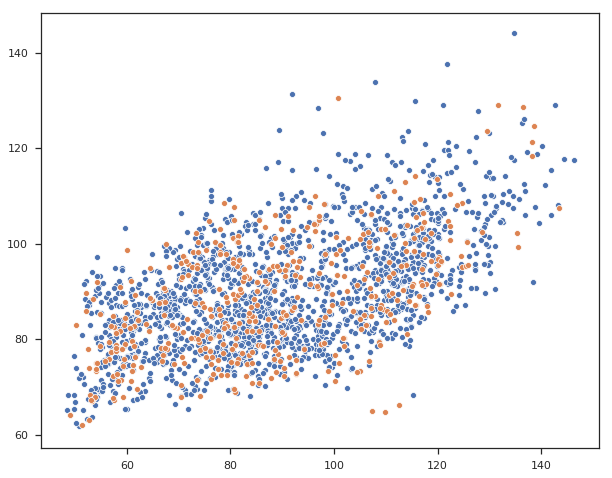

RMSE training set: 17.854866969072084
RMSE testing set: 17.980458658267352
MAE training set: 15.179370128663223
MAE testing set: 15.260610080688977


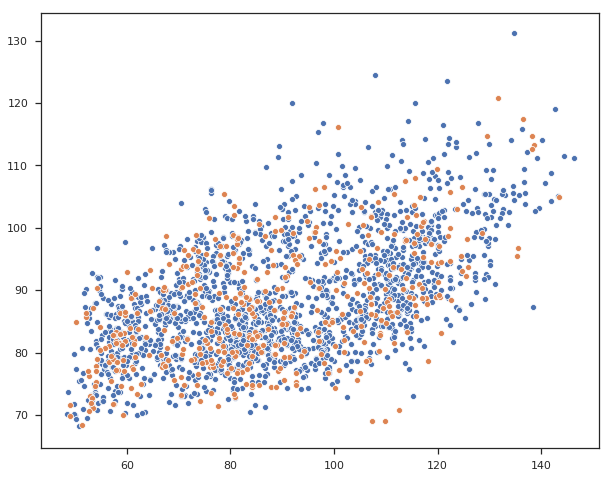

RMSE training set: 21.292324914839654
RMSE testing set: 21.105085633933022
MAE training set: 17.740603477379178
MAE testing set: 17.589658855770423


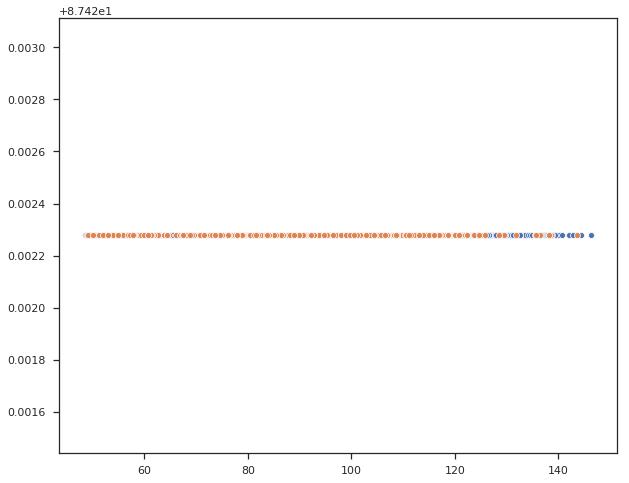

In [48]:
from sklearn.linear_model import ElasticNet
evaluateClf(ElasticNet, { 'alpha':0.1,'random_state':0})

**SVM**

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE training set: 12.981518095905955
RMSE testing set: 19.450659627415206
MAE training set: 8.7151345125555
MAE testing set: 15.829408330883302


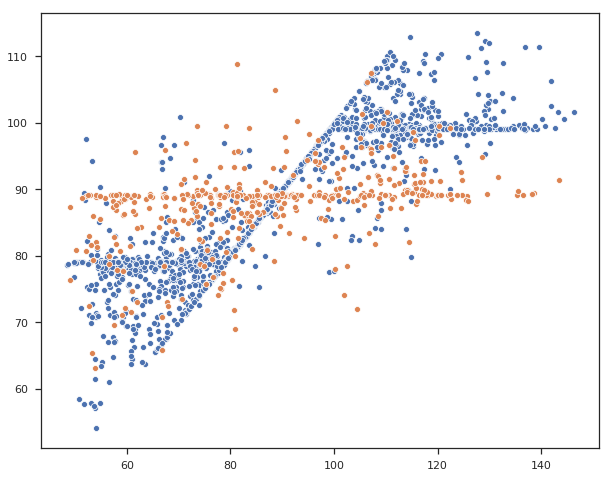

RMSE training set: 9.227017106178229
RMSE testing set: 17.749888988667582
MAE training set: 5.9023015823331715
MAE testing set: 13.952249614724009


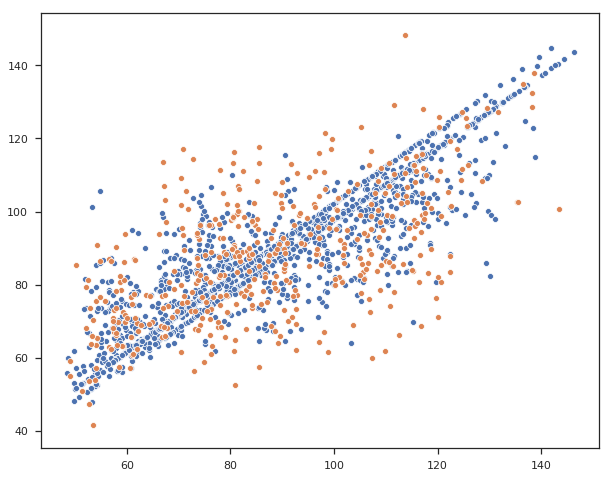

RMSE training set: 15.491930023680625
RMSE testing set: 17.289739928453354
MAE training set: 12.73966614115368
MAE testing set: 14.297301350321407


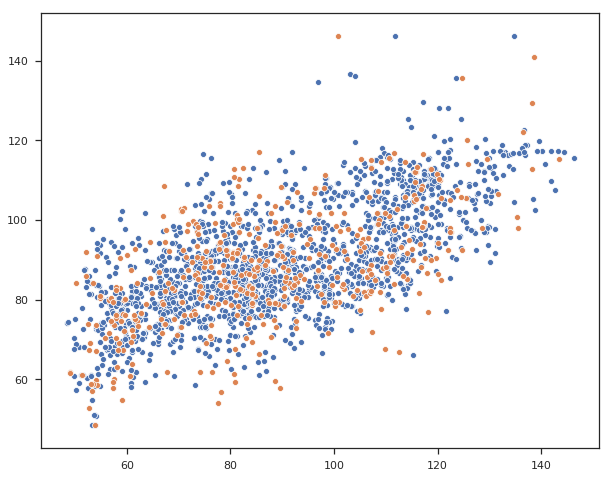

In [49]:
from sklearn import svm
evaluateClf(svm.SVR, {'C':10})

**Stochastic Gradient**

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
RMSE training set: 132688330909337.53
RMSE testing set: 132688538940667.86
MAE training set: 132438910269957.16
MAE testing set: 132454643250830.95


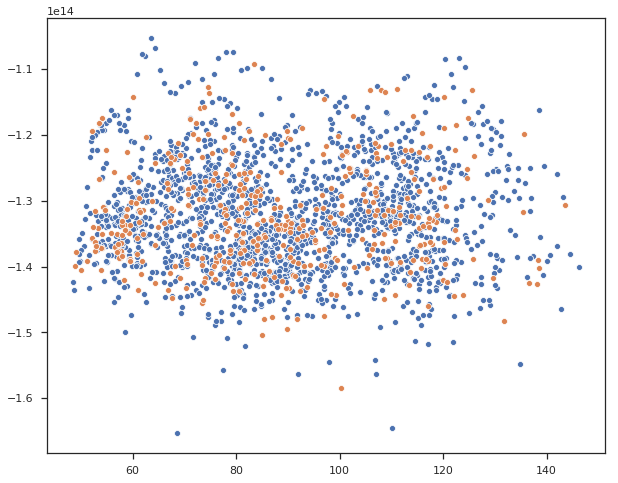

RMSE training set: 17.56019771790901
RMSE testing set: 17.801380461107932
MAE training set: 14.990447011585868
MAE testing set: 14.99659583679005


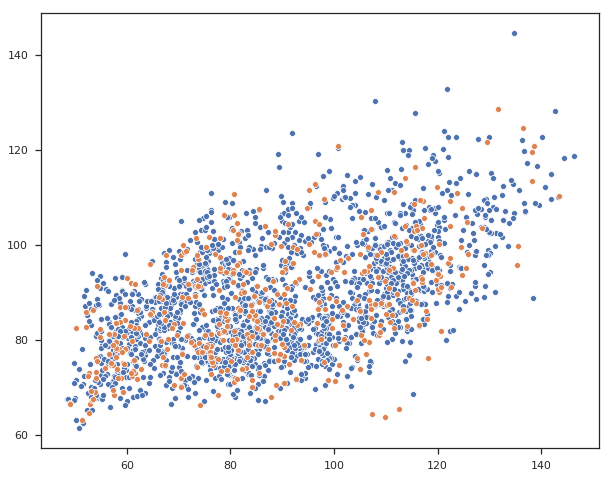

RMSE training set: 18.201699122510412
RMSE testing set: 18.590465670203585
MAE training set: 15.412230759178755
MAE testing set: 15.740600844544769


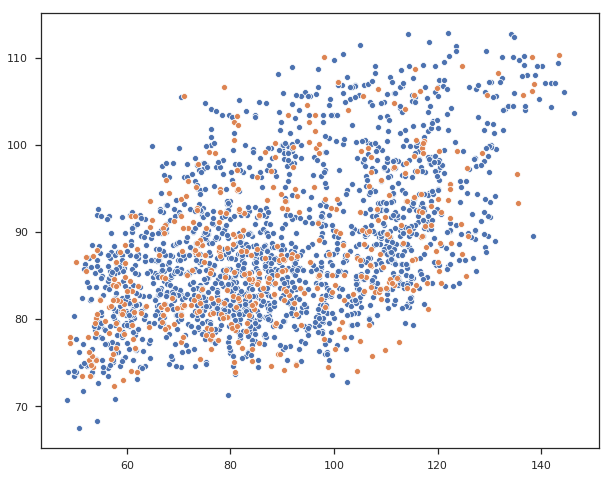

In [50]:
from sklearn.linear_model import SGDClassifier
evaluateClf(linear_model.SGDRegressor, {'max_iter':1000, 'tol':1e-3})

**Nearest Neighbors**

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')
RMSE training set: 14.883413849149326
RMSE testing set: 17.695175241999454
MAE training set: 11.95530593071051
MAE testing set: 14.686643192488264


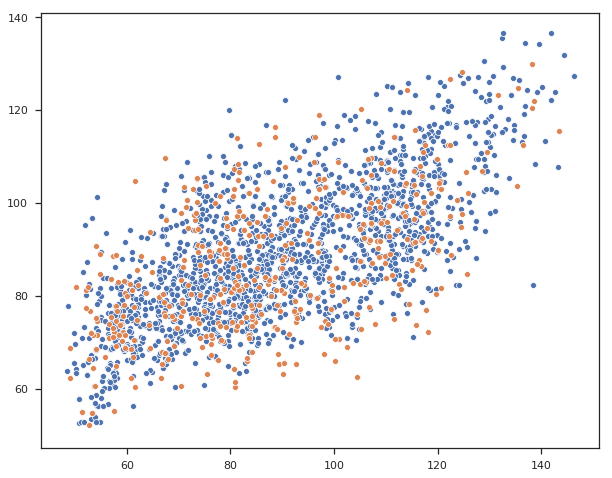

RMSE training set: 15.435143894795333
RMSE testing set: 18.91017302234203
MAE training set: 12.455453049389686
MAE testing set: 15.428498199706011


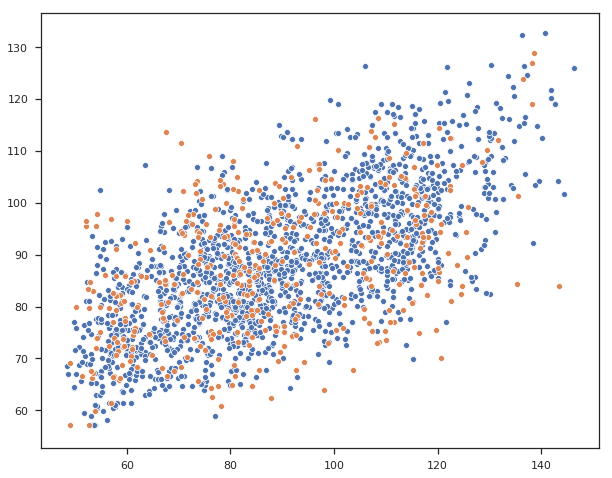

RMSE training set: 15.55113953412775
RMSE testing set: 18.42740652562218
MAE training set: 12.48788852716034
MAE testing set: 14.998787798368484


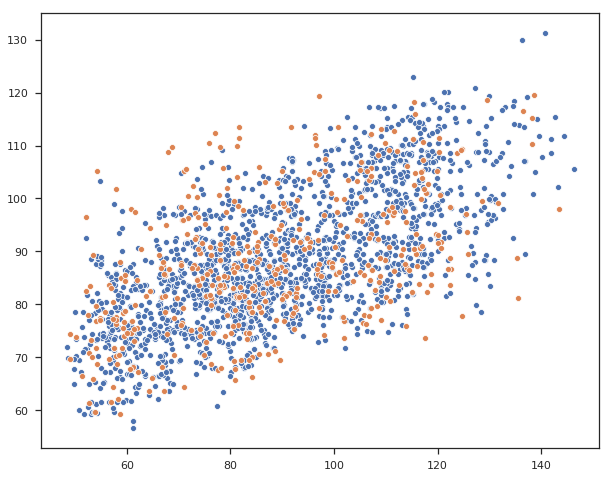

In [51]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train, Y_train) 
tneigh = KNeighborsRegressor(n_neighbors=5)
tneigh.fit(Xt_train, Yt_train) 
qneigh = KNeighborsRegressor(n_neighbors=5)
qneigh.fit(Xq_train, Yq_train)
evaluateClf(KNeighborsRegressor, {'n_neighbors':5})

**Robust linear model estimation using RANSAC**


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)
RMSE training set: 25.749154096094564
RMSE testing set: 27.597047694316174
MAE training set: 20.587444107790905
MAE testing set: 21.885426038632602


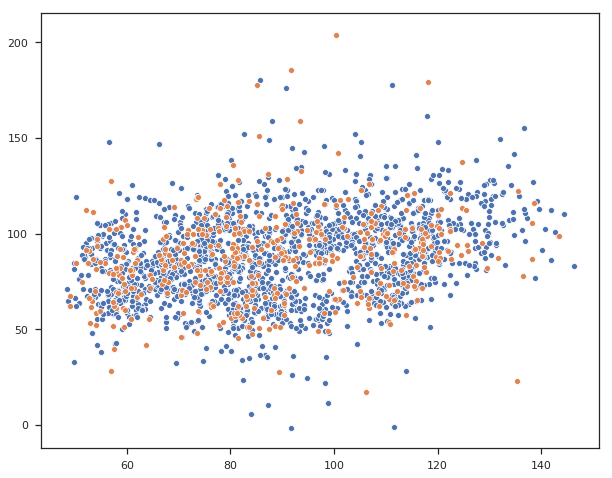

RMSE training set: 25.022318393428066
RMSE testing set: 26.19819868787543
MAE training set: 20.126476436197283
MAE testing set: 21.428510256678216


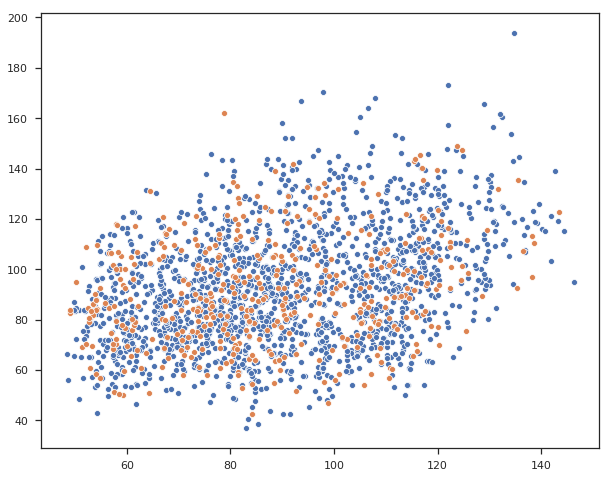

RMSE training set: 25.120188343484568
RMSE testing set: 25.494003584554353
MAE training set: 20.210275729179774
MAE testing set: 20.461321437367562


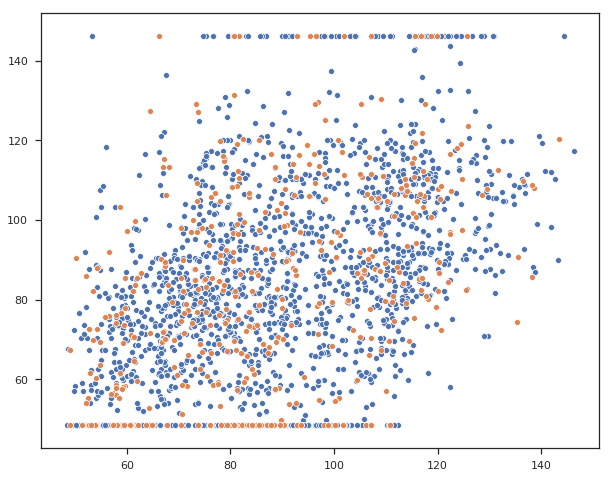

In [52]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, Y_train)
transac = linear_model.RANSACRegressor()
transac.fit(Xt_train, Yt_train) 
qransac = linear_model.RANSACRegressor()
qransac.fit(Xq_train, Yq_train)
evaluateClf(linear_model.RANSACRegressor, {})

**XGBoost**

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=256, n_jobs=1,
       nthread=4, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
RMSE training set: 12.95403167457716
RMSE testing set: 14.904616421858583
MAE training set: 10.642291647193717
MAE testing set: 12.23177549263681


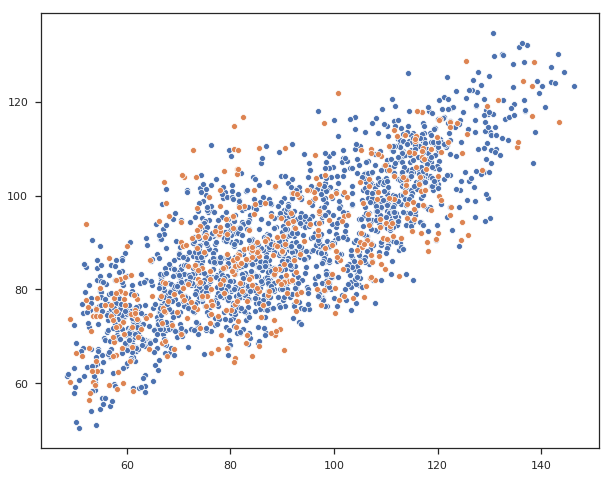

RMSE training set: 12.960879133256153
RMSE testing set: 14.90696763173233
MAE training set: 10.640546359357597
MAE testing set: 12.191561780834785


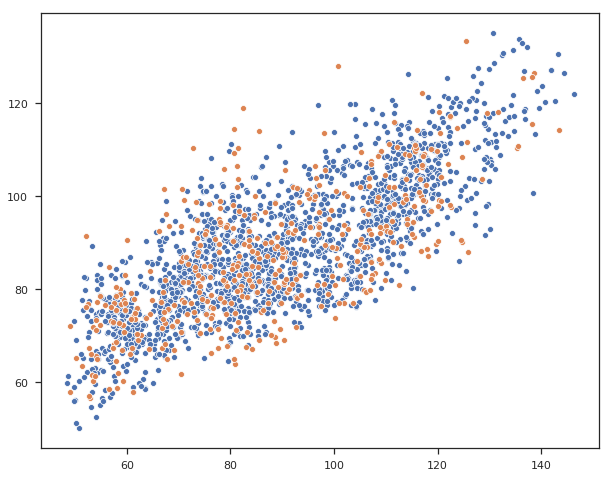

RMSE training set: 13.38424383079966
RMSE testing set: 15.308582918915103
MAE training set: 10.986406297765297
MAE testing set: 12.539476905702701


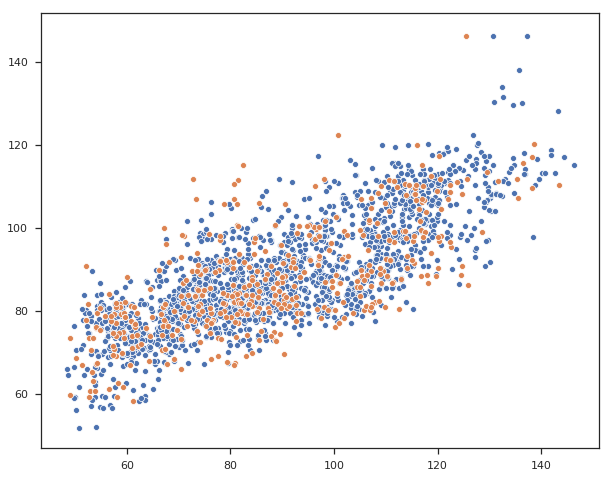

In [53]:
import xgboost as xgb

evaluateClf(xgb.XGBRegressor, { 'max_depth':2, 'n_estimators':256, 'learning_rate':0.10, 'nthread': 4} )

**Analiza głównych składowych - PCA**

In [54]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale
import scipy.spatial.distance as dist
from sklearn.manifold import MDS

In [122]:
pt_scaled = scale(pt)
qt_scaled = scale(qt)

pt_distance = dist.pdist(pt_scaled)
pt_distance = dist.squareform(pt_distance)
pt_punkty = MDS(n_components=2, dissimilarity='precomputed', random_state=1,eps=1e-5,n_init=10).fit_transform(pt_distance)

pca_pt = PCA(8,whiten=True).fit(pt_scaled)
pca_pt.explained_variance_ratio_
pt_components = pca_pt.transform(pt_scaled)

In [121]:
pca_pt.explained_variance_ratio_

array([0.22819307, 0.16116197, 0.10625754, 0.0769338 , 0.07123432,
       0.06738065, 0.05770351, 0.05273907, 0.04159487, 0.03647508])

In [62]:
qt_distance = dist.pdist(qt_scaled)
qt_distance = dist.squareform(qt_distance)
qt_punkty = MDS(n_components=2, dissimilarity='precomputed', random_state=1,eps=1e-5,n_init=10).fit_transform(qt_distance)

pca_qt = PCA(4,whiten=True).fit(qt_scaled)
pca_qt.explained_variance_ratio_
qt_components = pca_qt.transform(qt_scaled)

In [63]:
pca_qt.explained_variance_ratio_

array([0.21966285, 0.15852475, 0.10428241, 0.08308298])

In [55]:
df_pca = pd.DataFrame({'var':pca_pt.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']})
print(df_pca)
sns.barplot(x='PC',y="var", data=df_pca)

NameError: name 'pca_pt' is not defined

**Grupowanie**

In [56]:
pt_scaled = scale(pt)
qt_scaled = scale(qt)

In [57]:
pts_array = pt.values
Xpts = pts_array[:, (0,1,2,3,4,5,6,7,9,10,11,12,14)].astype(np.float)
Ypts = pts_array[:, waterlv_index].astype(np.float)

In [58]:
qts_array = qt.values
Xqts = qts_array[:, (0,1,2,3,4,5,6,7,9,10,11,12,14)].astype(np.float)
Yqts = qts_array[:, waterlv_index].astype(np.float)

In [59]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

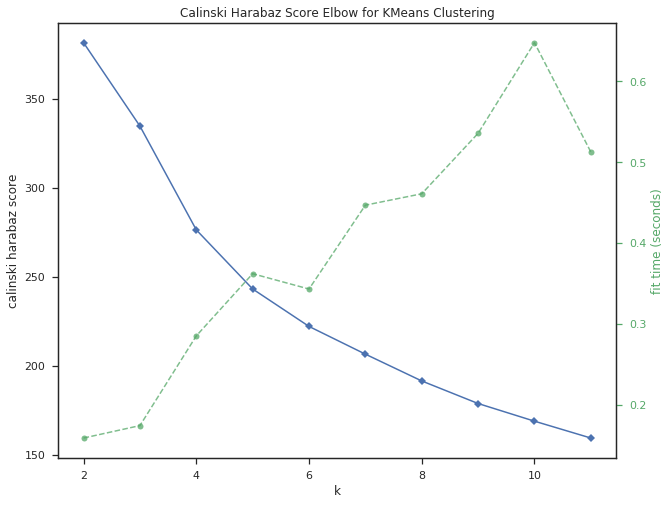

In [60]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),  metric='calinski_harabaz', locate_elbow=True)

visualizer.fit(Xpts)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [61]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

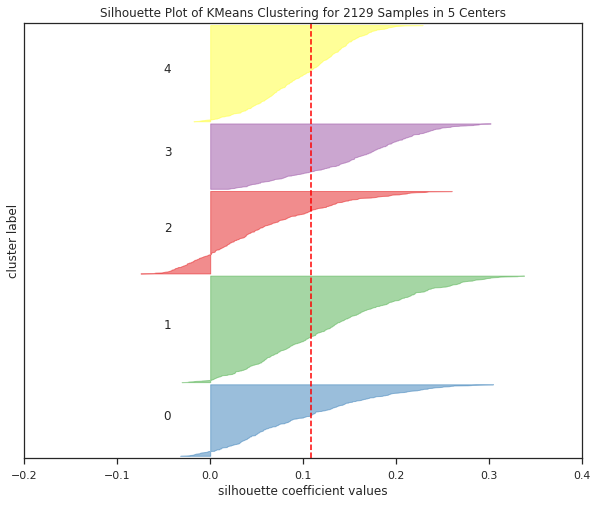

In [62]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Xpts)        # Fit the data to the visualizer
visualizer.poof()

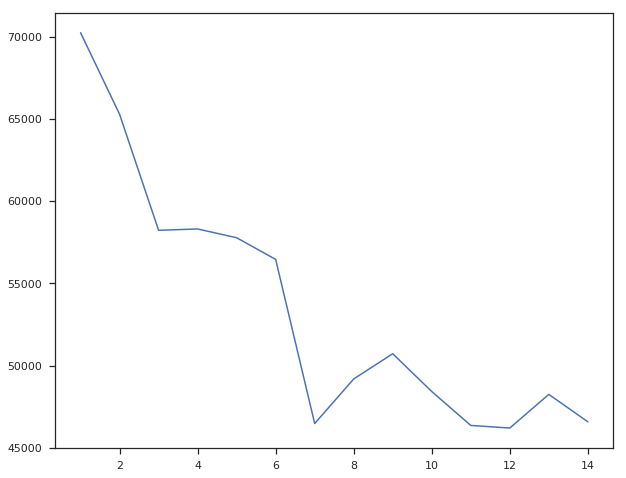

In [67]:
from sklearn import mixture
gmm_aic=[]
for n in range(1,15):
    m = mixture.GaussianMixture(n_components=n, covariance_type='full').fit(Xpts)
    gmm_aic.append(m.aic(Xpts))   

plt.plot(range(1,15),gmm_aic)

In [68]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
db = DBSCAN(eps=0.5, min_samples=2).fit(Xpts)
labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Xpts[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Xpts[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


NameError: name 'core_samples_mask' is not defined

**Grid Search**
**Random Forest**

In [69]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, 30], 'min_samples_split': [0.1,0.3,0.6],
                   'min_samples_leaf': [1,2,4], 'min_weight_fraction_leaf': [0, 0.25, 0.5], 'min_impurity_split': [1,2,4]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

{'max_depth': 10,
 'min_impurity_split': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 10}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=1,
           min_samples_leaf=1, min_samples_split=0.1,
           min_weight_fraction_leaf=0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/agnieszka/anaconda3/lib/python3.6/site-packages/sklearn

RMSE training set: 16.058646853468705
RMSE testing set: 16.68912248751427
MAE training set: 13.755825911013055
MAE testing set: 14.25569298049944


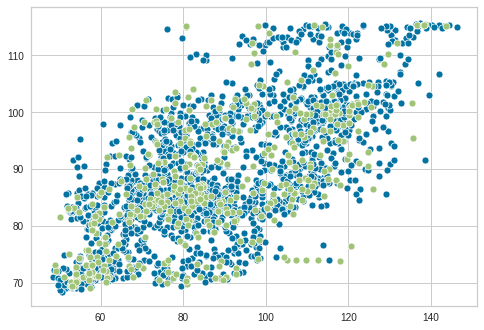

RMSE training set: 20.261677212591525
RMSE testing set: 20.210879885851867
MAE training set: 16.94162802849024
MAE testing set: 16.854943035125054


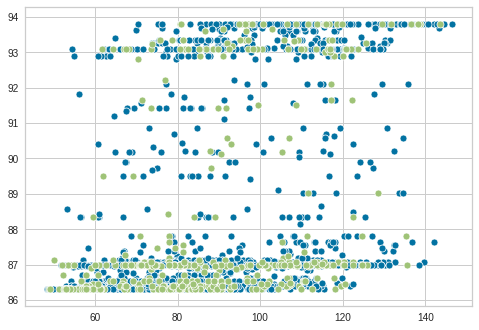

RMSE training set: 21.291708797735712
RMSE testing set: 21.104963281161492
MAE training set: 17.740599996080796
MAE testing set: 17.589992864285872


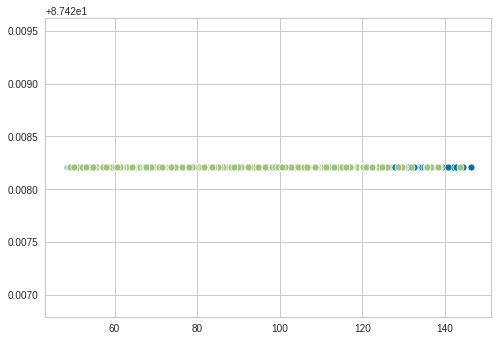

In [69]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':200, 'max_depth': 10, 'random_state': 1, 'min_impurity_split': 1,
                                   'min_samples_leaf': 1, 'min_samples_split':0.1, 'min_weight_fraction_leaf': 0})

In [73]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, 30], 'min_samples_split': [0.1,0.3,0.6],
                   'min_samples_leaf': [1,2,4]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 0.1,
 'n_estimators': 10}

In [74]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [8, 10,12], 'max_depth': [8, 10, 12], 'min_samples_split': [0.05, 0.1,0.15]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

{'max_depth': 12, 'min_samples_split': 0.05, 'n_estimators': 10}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=0.05,
           min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
RMSE training set: 14.625107327140045
RMSE testing set: 15.978816162682408
MAE training set: 12.374017970644747
MAE testing set: 13.457146614889524


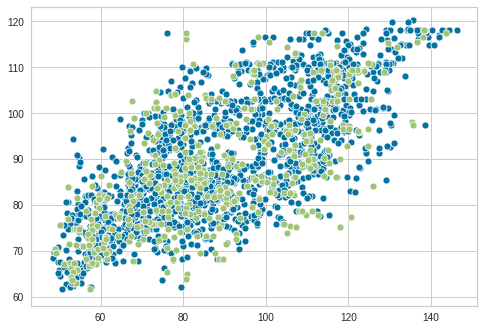

RMSE training set: 14.665754689235875
RMSE testing set: 16.00444842679255
MAE training set: 12.345011859431564
MAE testing set: 13.384677514416463


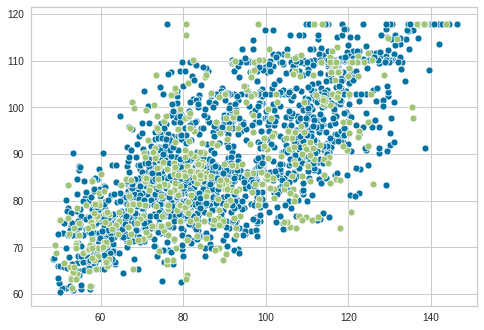

RMSE training set: 15.027324410455329
RMSE testing set: 16.207612640211543
MAE training set: 12.612388504861096
MAE testing set: 13.621794120952096


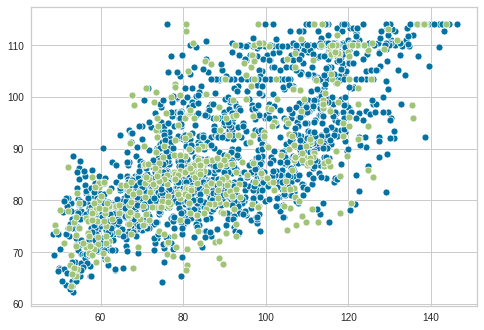

In [76]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':12, 'max_depth': 10, 'random_state': 1, 'min_samples_split': 0.05, 'min_samples_leaf': 1})

In [77]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 20, 30]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [80]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'n_estimators': [180, 200, 220], 'max_depth': [18, 20, 22]}

model = RandomForestRegressor(random_state=1)

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

{'max_depth': 20, 'n_estimators': 200}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
RMSE training set: 5.214836638823568
RMSE testing set: 13.668317953873085
MAE training set: 4.21323742095898
MAE testing set: 11.016190628095526


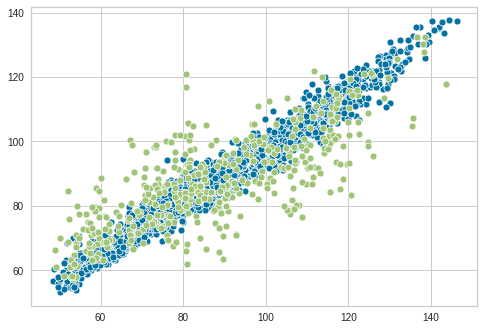

RMSE training set: 5.263608148517246
RMSE testing set: 13.815206576837141
MAE training set: 4.215783814013347
MAE testing set: 11.032797431833101


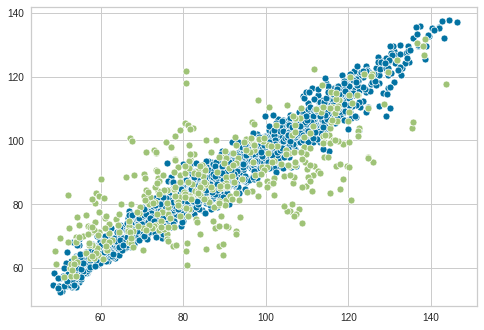

RMSE training set: 6.053540097335559
RMSE testing set: 14.091985989843506
MAE training set: 4.686370153850401
MAE testing set: 11.363675423620625


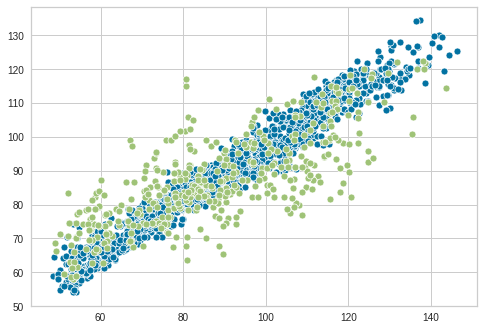

In [78]:
from sklearn.ensemble import RandomForestRegressor
evaluateClf(RandomForestRegressor, { 'n_estimators':200, 'max_depth': 20, 'random_state': 1})

**Grid Search**
**XGboost**

In [92]:
tuned_parameters = {'n_estimators': [10, 100, 250, 500], 'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.07, 0.1], 'objective':['reg:linear'], 'min_child_weight': [1, 2]}

model = xgb.XGBRegressor()

grids= GridSearchCV(model ,tuned_parameters,cv=5,scoring='neg_mean_absolute_error',n_jobs=12)
grids.fit(X_train,Y_train)
grids.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 500,
 'objective': 'reg:linear'}

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
RMSE training set: 13.073024899006173
RMSE testing set: 14.953059579597493
MAE training set: 10.79029438012079
MAE testing set: 12.363475479699076


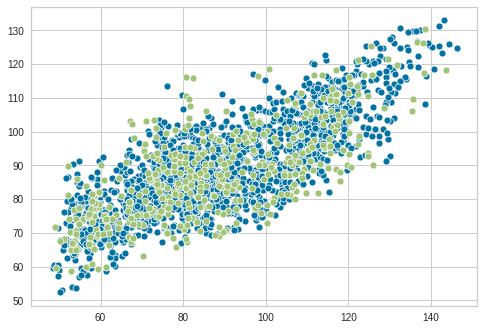

RMSE training set: 12.926564580684278
RMSE testing set: 15.02126597133683
MAE training set: 10.724095495099922
MAE testing set: 12.392663768665434


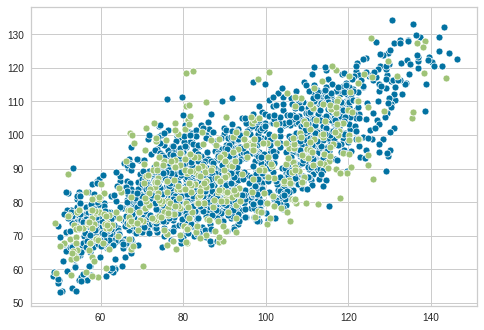

RMSE training set: 13.351984541345145
RMSE testing set: 15.225869311532183
MAE training set: 11.024438414496842
MAE testing set: 12.556180032237712


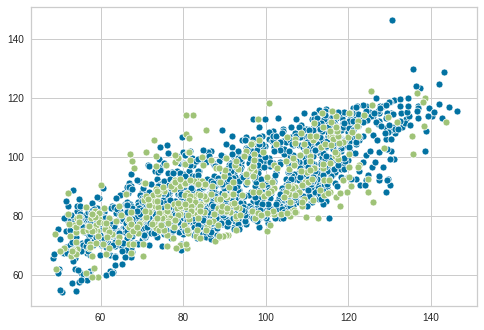

In [91]:
evaluateClf(xgb.XGBRegressor, { } )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.09, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
RMSE training set: 10.495650563996774
RMSE testing set: 14.180092959667943
MAE training set: 8.566161071992383
MAE testing set: 11.580885815329394


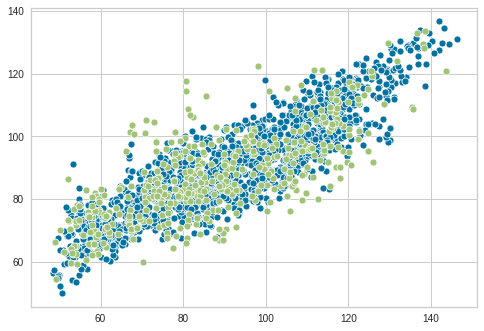

RMSE training set: 10.597370580959382
RMSE testing set: 14.165218650234177
MAE training set: 8.609858192167401
MAE testing set: 11.538370576040972


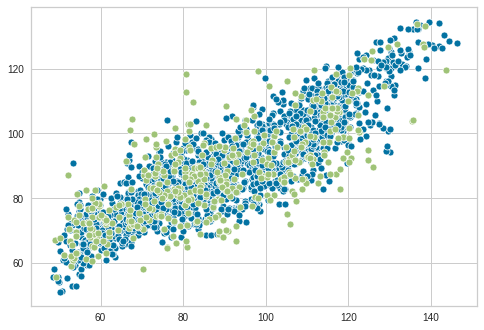

RMSE training set: 11.040583555343556
RMSE testing set: 14.560408674890503
MAE training set: 8.894491679841416
MAE testing set: 11.950447065840738


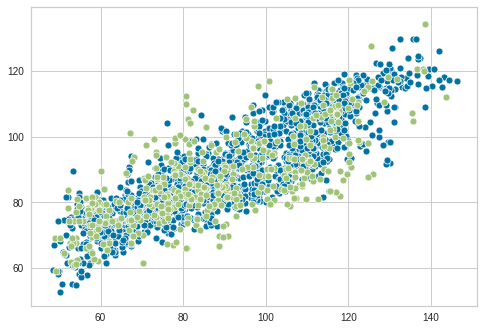

In [100]:
evaluateClf(xgb.XGBRegressor, {'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.09, 'min_child_weight': 1,
                              'objective': 'reg:linear'} )

Residuals

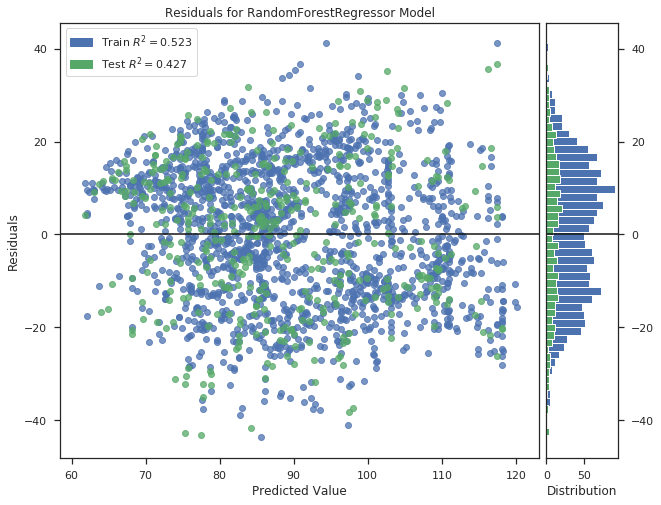

In [70]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
modelRF = RandomForestRegressor(n_estimators=12, max_depth= 10, random_state=1, min_samples_split= 0.05, min_samples_leaf=1)
visualizer = ResidualsPlot(modelRF)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.poof()    

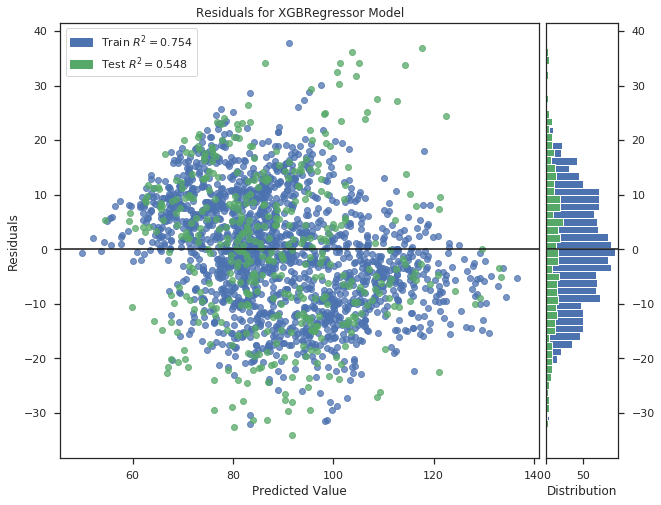

In [71]:
modelXGB = xgb.XGBRegressor(n_estimators =60, max_depth= 5, learning_rate= 0.09, min_child_weight= 1,
                              objective= 'reg:linear')
visualizer = ResidualsPlot(modelXGB)

visualizer.fit(X_train, Y_train)  # Fit the training data to the visualizer
visualizer.score(X_validation, Y_validation)  # Evaluate the model on the test data
visualizer.poof()    